# Running Genesis4

In [1]:
import genesis.version4 as g4

%config InlineBackend.figure_format = 'retina' # Nicer plots

## Create the main input and lattice

In [2]:
main = g4.MainInput(
    [
        g4.Setup(
            rootname="Example1",
            beamline="FEL",
            gamma0=11357.82,
            delz=0.045,
            nbins=8,
            shotnoise=False,
        ),
        g4.LatticeNamelist(zmatch=9.5),
        g4.Field(power=5000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
        g4.Beam(delgam=1.0, current=3000.0, ex=4e-07, ey=4e-07),
        g4.Track(),
    ],
)

lattice = g4.Lattice(
    {
        "D1": g4.Drift(L=0.44),
        "D2": g4.Drift(L=0.24),
        "FEL": g4.Line(elements=["FODO"] * 6),
        "FODO": g4.Line(
            elements=["UND", "D1", "QF", "D2", "UND", "D1", "QD", "D2"],
        ),
        "QD": g4.Quadrupole(L=0.08, k1=-2.0),
        "QF": g4.Quadrupole(L=0.08, k1=2.0),
        "UND": g4.Undulator(aw=0.84853, lambdau=0.015, nwig=266, helical=True),
    }
)

## Run without verbose output 

In [3]:
G = g4.Genesis4(main, lattice, verbose=False)

In [4]:
output = G.run()

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

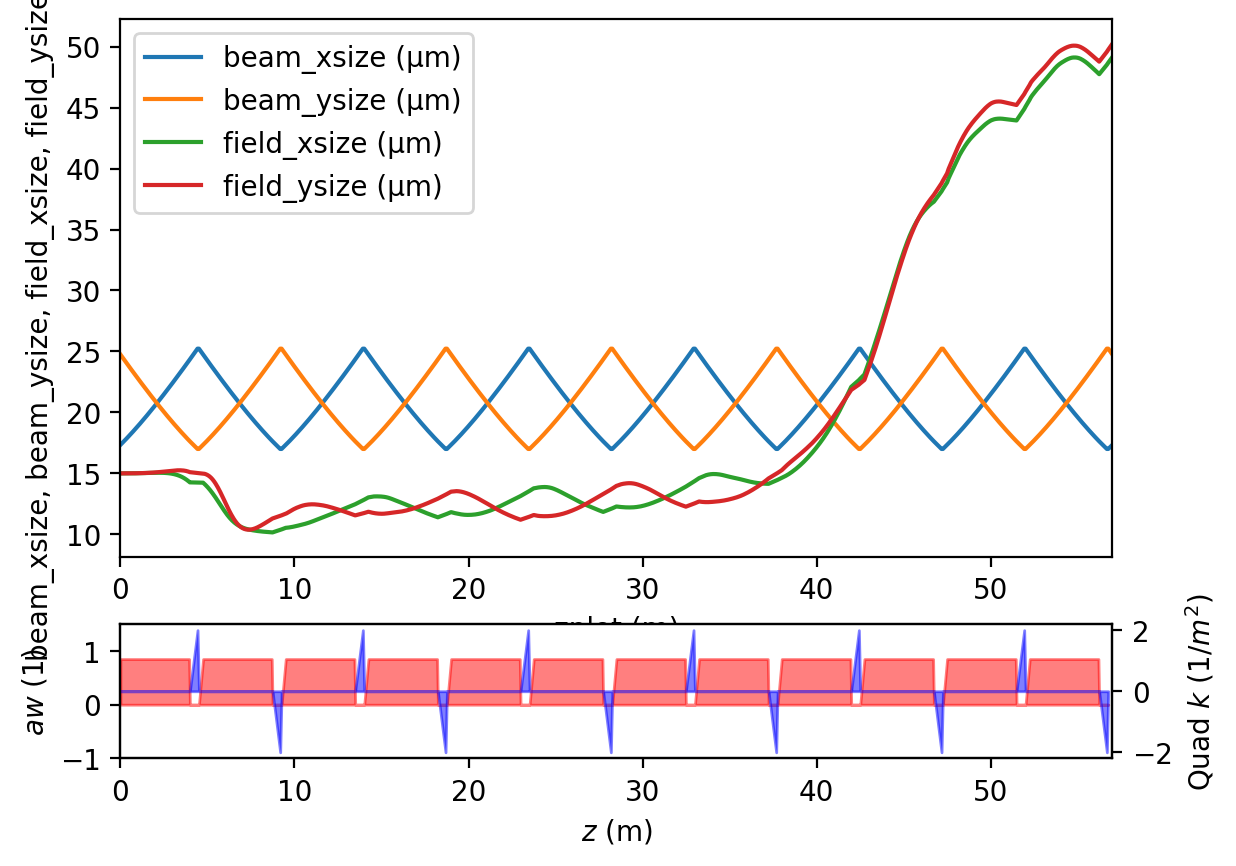

In [5]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

In [6]:
output.info()

<genesis.tools.table_output.<locals>._InfoObj at 0x167382150>

In [7]:
output["beam_energy"]

array([[11357.82      ],
       [11357.82      ],
       [11357.82      ],
       ...,
       [11357.22529262],
       [11357.22529262],
       [11357.22529262]])

We can still access the output in `output.run.output_log`:

In [8]:
print(output.run.output_log[:200], "...")

---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-01-11 18:10:26 [UTC] from Git Commit ID: 
Starting Time: Thu May 30 16:03: ...


## Run with verbose output

This allows you to monitor Genesis4 as it runs.

In [9]:
G.verbose = True
output = G.run()

Running Genesis4 in /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpf4mku76b
/Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l genesis.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-01-11 18:10:26 [UTC] from Git Commit ID: 
Starting Time: Thu May 30 16:03:21 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Matching for periodic solution between z = 0 and z = 9.5 :
   betax (m) : 8.53711
   alphax    : -0.703306
   phix (deg): 45.818
   betay (m) : 17.3899
   alphay    : 1.40348
   phiy (deg): 45.818
Generating input radiation field for HARM = 1 ...
Generating input particle distribution...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation: 20% done
  Calculation: 30% done
  Calculation: 40% done
  Calculation: 50% done
  C

## Configure MPI for running on your machine

By default, Genesis4 objects are configured to use 1 processor (`G.nproc = 1`).

To run Genesis4 with MPI, we first need to tell it how many processors to use. To run on 8 cores, we could simply set:
```python
G.nproc = 8
```

A special value of `0` or `None` will tell LUME-Genesis to use all available processor cores on your machine:
```python
G.nproc = 0
```
We'll use that convenient value below.


In [10]:
G.nproc = 0
output = G.run()

Setting use_mpi = True because nproc = 12
Running Genesis4 in /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpf4mku76b
/Users/klauer/miniforge3/envs/lume-genesis/bin/mpirun -n 12 /Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l genesis.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-01-11 18:10:26 [UTC] from Git Commit ID: 
Starting Time: Thu May 30 16:03:27 2024

MPI-Comm Size: 12 nodes

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Matching for periodic solution between z = 0 and z = 9.5 :
   betax (m) : 8.53711
   alphax    : -0.703306
   phix (deg): 45.818
   betay (m) : 17.3899
   alphay    : 1.40348
   phiy (deg): 45.818
Generating input radiation field for HARM = 1 ...
Generating input particle distribution...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% 

We should see the "MPI-Comm size" as the number of processor cores used by Genesis4 in the output:

In [11]:
for line in G.output.run.output_log.splitlines():
    if "MPI" in line:
        print(line)

MPI-Comm Size: 12 nodes


In [12]:
output.run.to_table()

Attribute,Value,Type,Description
error,False,bool,`True` if an error occurred during the Genesis run
error_reason,,Optional[str],"Error explanation, if `error` is set."
run_script,/Users/klauer/miniforge3/envs/lume-genesis/bin/mpirun -n 12 /Users/klauer/miniforge3/envs/lume-genes...,str,The command-line arguments used to run Genesis
run_time,7.110207250108942,float,Wall clock run time of the process
